# Letter Recognition

## 1. Import needed libraries

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

## 2. Directory listings of the images

_NOTE_: This directory must be set from the shell. It requires some _bash scripting_ knowledge and also needs Shotor dataset to be downloaded in your computer.

In [2]:
os.getenv("SHOTOR_IMAGES")

'/Users/prp-e/Downloads/Shotor_Images'

In [3]:
directory_listing = os.listdir(os.getenv("SHOTOR_IMAGES"))

## 3. Testing and randomizing the data

In [5]:
import random

In [10]:
directory_listing[random.randrange(len(directory_listing))]

'53795.tif'

## 3.1. Testing opencv on a random image from Shotor (To make sure tif is supported)

In [42]:
image_path = os.getenv("SHOTOR_IMAGES") + "/" + directory_listing[random.randrange(len(directory_listing))]

image = cv2.imread(image_path)

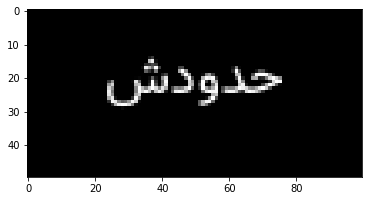

In [43]:
%matplotlib inline

plt.imshow(image)

## 3.2. Developing a function to select 200 images randomly

In [50]:
def generate_dataset():
    output_folder = "images/"
    
    counter = 0
    images = []
    
    while counter < 200:
        image_path = os.getenv("SHOTOR_IMAGES") + "/" + directory_listing[random.randrange(len(directory_listing))]
        image = cv2.imread(image_path)
        cv2.imwrite(f'{output_folder}/{counter}.jpg', image)
        counter += 1
        
    return True

In [51]:
images = generate_dataset()

In [52]:
images

True

## 4. Testing the sub-dataset we've created

In [53]:
directory_listing = os.listdir('images')

In [54]:
len(directory_listing)

201

In [55]:
image = cv2.imread(f'images/{directory_listing[random.randrange(len(directory_listing))]}')

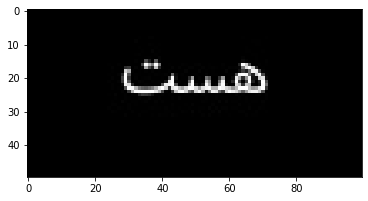

In [57]:
%matplotlib inline

plt.imshow(image)

# 5. Keeping the listing of Persian letters

In [58]:
letters = """alef
be 
pe 
te 
the 
jim 
che 
he 
khe 
dal 
zal
re
ze
zhe
sin
shin
sad
zad
ta
za
ein
qein
fe
quf
kaf
gaf
lam
mim 
nun 
vav
he_docheshm
ye
"""

In [59]:
letters = letters.split()

In [60]:
letters

['alef',
 'be',
 'pe',
 'te',
 'the',
 'jim',
 'che',
 'he',
 'khe',
 'dal',
 'zal',
 're',
 'ze',
 'zhe',
 'sin',
 'shin',
 'sad',
 'zad',
 'ta',
 'za',
 'ein',
 'qein',
 'fe',
 'quf',
 'kaf',
 'gaf',
 'lam',
 'mim',
 'nun',
 'vav',
 'he_docheshm',
 'ye']

In [66]:
persian_alphabet = "ابپتثجچحخدذرزژسشصضطظعغفقکگلمنوهی"
persian_alphabet = [char for char in persian_alphabet]

In [70]:
inference_letters = dict()

for letter, p_letter in zip(letters, persian_alphabet):
    inference_letters[letter] = p_letter

In [71]:
inference_letters['alef']

'ا'

## 6. Basic model inference

In [72]:
import torch

## 6.1. SSL problem on macOS

Run the following cell if you have macOS, or in case you get any errors related to SSL certificate.

In [73]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## 6.2. Loading the model

In [74]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/letters.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-21 Python-3.8.6 torch-1.10.0 CPU

Fusing layers... 
Model summary: 290 layers, 20978205 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


## 6.3. Loading sample image

In [75]:
image = cv2.imread('../letter_inference.png')

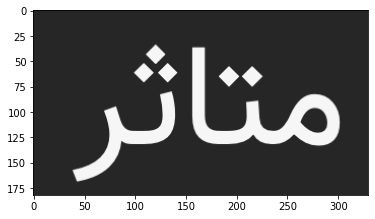

In [76]:
%matplotlib inline

plt.imshow(image)

## 6.4. Testing the model on single image

In [ ]:
result = model(image)